In [ ]:
!pip install tweepy

# 1. Authenticate to Twitter

In [19]:
# Import tweepy to work with the twitter API
import tweepy as tw

# Import numpy and pandas to work with dataframes
import numpy as np
import pandas as pd

# Import seaborn and matplotlib for viz
from matplotlib import pyplot as plt

In [20]:
consumer_key = 'UcerJrvbvJ4cCu0js2bIJGa72'
consumer_secret = '26LtLRkWgaC4fufaCiX72oRVszwKY0PGjQLlTEysYfoOfb1Snb'
access_token = '288837693-fDCoDYmfvbbIwTQKXPmIoM8U8Z3nOxm0YV9TdYxt'
access_token_secret = 'HbmyQhpWDq0NgNIasvV0xTlj5pLfi6I7A1YVKDVonKsqa'

In [21]:
# Authenticate
auth = tw.OAuthHandler(consumer_key, consumer_secret)
# Set Tokens
auth.set_access_token(access_token, access_token_secret)
# Instantiate API
api = tw.API(auth, wait_on_rate_limit=True)

# 2. Get Tweets

In [22]:
hashtag = "#Championsleaguefinal"
query = tw.Cursor(api.search, q=hashtag).items(1000)
tweets = [{'Tweet':tweet.text, 'Timestamp':tweet.created_at} for tweet in query]
print(tweets)

[{'Tweet': 'RT @SurajCh4248417: Out of Control !\n\nCheck it out - https://t.co/4LaNbug82H\n#FreePalestine \n#BICYCLE \n#Israeli \n#Formula1 \n#BakuGP \n#Maske…', 'Timestamp': datetime.datetime(2021, 6, 16, 13, 31, 43)}, {'Tweet': 'RT @TheCFCTALKPod: WE ARE CHAMPIONS LEAGUE WINNERS!!! 💙💙😭\n\n#ChampionsLeagueFinal #ChelseaFC #UCLfinal https://t.co/APad50lqWD', 'Timestamp': datetime.datetime(2021, 6, 16, 11, 16, 47)}, {'Tweet': '#ChampionsLeagueFinal le barça , le real et la juventus devrait bien participer  à la prochaine ligue des champions… https://t.co/MyyjTcJ3V8', 'Timestamp': datetime.datetime(2021, 6, 16, 11, 11, 7)}, {'Tweet': 'Still thinking 🤔 of the moment when the #blues were lifting up the #ChampionsLeagueFinal trophy 🏆 so happy 🤗🤗😵\u200d💫', 'Timestamp': datetime.datetime(2021, 6, 16, 10, 25, 27)}, {'Tweet': 'RT @mrwtffacts: In 2005, a Liverpool fan committed suicide at halftime after his team went down 3-0 to AC Milan in the 2005 #ChampionsLeagu…', 'Timestamp': datetime.date

In [23]:
tweets[0]

{'Tweet': 'RT @SurajCh4248417: Out of Control !\n\nCheck it out - https://t.co/4LaNbug82H\n#FreePalestine \n#BICYCLE \n#Israeli \n#Formula1 \n#BakuGP \n#Maske…',
 'Timestamp': datetime.datetime(2021, 6, 16, 13, 31, 43)}

In [24]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,Tweet,Timestamp
0,RT @SurajCh4248417: Out of Control !\n\nCheck ...,2021-06-16 13:31:43
1,RT @TheCFCTALKPod: WE ARE CHAMPIONS LEAGUE WIN...,2021-06-16 11:16:47
2,"#ChampionsLeagueFinal le barça , le real et la...",2021-06-16 11:11:07
3,Still thinking 🤔 of the moment when the #blues...,2021-06-16 10:25:27
4,"RT @mrwtffacts: In 2005, a Liverpool fan commi...",2021-06-16 09:15:15


In [25]:
chelsea_handle = ['Chelsea', 'Chelsea FC', 'CFC', 'cfc','Chelseafc', 'Chelsea\'s']
mancity_handle = ['Manchestercity', 'Mancity', 'MCI', 'mci', 'mancity\'s']

In [26]:
def identify_subject(tweet, refs):
    flag = 0 
    for ref in refs:
        if tweet.find(ref) != -1:
            flag = 1
    return flag

df['chelsea'] = df['Tweet'].apply(lambda x: identify_subject(x, chelsea_handle)) 
df["mancity"] = df['Tweet'].apply(lambda x: identify_subject(x, mancity_handle))
df.head(10)

,Tweet,Timestamp,chelsea,mancity
0,RT @SurajCh4248417: Out of Control !\n\nCheck ...,2021-06-16 13:31:43,0,0
1,RT @TheCFCTALKPod: WE ARE CHAMPIONS LEAGUE WIN...,2021-06-16 11:16:47,1,0
2,"#ChampionsLeagueFinal le barça , le real et la...",2021-06-16 11:11:07,0,0
3,Still thinking 🤔 of the moment when the #blues...,2021-06-16 10:25:27,0,0
4,"RT @mrwtffacts: In 2005, a Liverpool fan commi...",2021-06-16 09:15:15,0,0
5,RT @130z_tv: Regardez ce que Thiago Silva a di...,2021-06-16 09:03:43,0,0
6,"My dear, dear friend Rob Haywood ⁦@haywood_rob...",2021-06-16 07:48:54,0,0
7,#CruelSummer\n#Checkpoint\n#COVIDVaccination\n...,2021-06-16 04:11:54,0,0
8,"RT @mrwtffacts: In 2005, a Liverpool fan commi...",2021-06-16 00:51:19,0,0
9,RT @loopooYT: 10.000€ sur Chelsea\n\n3 x 500€ ...,2021-06-15 22:12:00,1,0


In [27]:
df[df["chelsea"] == 1]

,Tweet,Timestamp,chelsea,mancity
1,RT @TheCFCTALKPod: WE ARE CHAMPIONS LEAGUE WIN...,2021-06-16 11:16:47,1,0
9,RT @loopooYT: 10.000€ sur Chelsea\n\n3 x 500€ ...,2021-06-15 22:12:00,1,0
10,RT @ChelseaBossMan: Titanic theme makes Chelse...,2021-06-15 21:27:16,1,0
12,@TaintlessRed Forever a legend now\nFact\n#Cha...,2021-06-15 19:33:11,1,0
19,RT @DaddyG_O_: Champions league final jersey a...,2021-06-15 17:37:56,1,0
...,...,...,...,...
483,RT @littlelesspod: *EPISODE 29* Eurovision \n\...,2021-06-08 13:14:42,1,0
485,⚽️THE LAST GOAL &amp; THE TWIST OF TALES ⚽️\n\...,2021-06-08 13:03:36,1,0
489,RT @littlelesspod: *EPISODE 29* Eurovision \n\...,2021-06-08 12:53:34,1,0
494,*EPISODE 29* Eurovision \n\n🏆 Chelsea: Champio...,2021-06-08 12:03:59,1,0


In [28]:
df[df["mancity"] == 1]

,Tweet,Timestamp,chelsea,mancity
57,CHAMPIONS OF EUROPE\n\nLondon’s First • London...,2021-06-14 12:00:04,1,1
176,RT @raulzito: Jamais será “só” futebol. Phil F...,2021-06-11 21:14:21,0,1
326,RT @Akuetieme_lawal: Don't say anything just R...,2021-06-09 21:02:39,1,1


# 3. Preprocess

In [29]:
# Import stopwords
import nltk
from nltk.corpus import stopwords

# Import textblob
from textblob import Word, TextBlob

In [30]:
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = stopwords.words('english')
custom_stopwords = ['RT', '#Championsleaguefinal']

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/vivekkannajayaprakash/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/vivekkannajayaprakash/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
def preprocess_tweets(tweet, custom_stopwords):
    processed_tweet = tweet
    processed_tweet.replace('[^\w\s]', '')
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in stop_words)
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in custom_stopwords)
    processed_tweet = " ".join(Word(word).lemmatize() for word in processed_tweet.split())
    return(processed_tweet)

df['Processed Tweet'] = df['Tweet'].apply(lambda x: preprocess_tweets(x, custom_stopwords))
df.head()

,Tweet,Timestamp,chelsea,mancity,Processed Tweet
0,RT @SurajCh4248417: Out of Control !\n\nCheck ...,2021-06-16 13:31:43,0,0,@SurajCh4248417: Out Control ! Check - https:/...
1,RT @TheCFCTALKPod: WE ARE CHAMPIONS LEAGUE WIN...,2021-06-16 11:16:47,1,0,@TheCFCTALKPod: WE ARE CHAMPIONS LEAGUE WINNER...
2,"#ChampionsLeagueFinal le barça , le real et la...",2021-06-16 11:11:07,0,0,"#ChampionsLeagueFinal le barça , le real et la..."
3,Still thinking 🤔 of the moment when the #blues...,2021-06-16 10:25:27,0,0,Still thinking 🤔 moment #blues lifting #Champi...
4,"RT @mrwtffacts: In 2005, a Liverpool fan commi...",2021-06-16 09:15:15,0,0,"@mrwtffacts: In 2005, Liverpool fan committed ..."


In [32]:
print('Base review\n', df['Tweet'][0])
print('\n------------------------------------\n')
print('Cleaned and lemmatized review\n', df['Processed Tweet'][0])

Base review
 RT @SurajCh4248417: Out of Control !

Check it out - https://t.co/4LaNbug82H
#FreePalestine 
#BICYCLE 
#Israeli 
#Formula1 
#BakuGP 
#Maske…

------------------------------------

Cleaned and lemmatized review
 @SurajCh4248417: Out Control ! Check - https://t.co/4LaNbug82H #FreePalestine #BICYCLE #Israeli #Formula1 #BakuGP #Maske…


# 4. Calculate Sentiment

In [33]:
# Calculate polarity
df['polarity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['Processed Tweet'].apply(lambda x: TextBlob(x).sentiment[1])
df[['Processed Tweet', 'chelsea', 'mancity', 'polarity', 'subjectivity']].head()

,Processed Tweet,chelsea,mancity,polarity,subjectivity
0,@SurajCh4248417: Out Control ! Check - https:/...,0,0,0.0,0.0
1,@TheCFCTALKPod: WE ARE CHAMPIONS LEAGUE WINNER...,1,0,0.0,0.0
2,"#ChampionsLeagueFinal le barça , le real et la...",0,0,0.2,0.3
3,Still thinking 🤔 moment #blues lifting #Champi...,0,0,0.8,1.0
4,"@mrwtffacts: In 2005, Liverpool fan committed ...",0,0,0.0,0.0


In [34]:
display(df[df['chelsea']==1][['chelsea','polarity','subjectivity']].groupby('chelsea').agg([np.mean, np.max, np.min, np.median]))
df[df['mancity']==1][['mancity','polarity','subjectivity']].groupby('mancity').agg([np.mean, np.max, np.min, np.median])

polarity                   subjectivity                 
             mean amax  amin median         mean amax amin median
chelsea                                                          
1        0.107499  1.0 -0.25    0.0     0.216465  1.0  0.0    0.0

polarity                   subjectivity                      
             mean  amax amin median         mean      amax amin median
mancity                                                               
1        0.083333  0.25  0.0    0.0     0.111111  0.333333  0.0    0.0

## 5. Visualise

In [35]:
mancity = df[df['mancity']==1][['Timestamp', 'polarity']]
mancity = mancity.sort_values(by='Timestamp', ascending=True)
mancity['MA Polarity'] = mancity.polarity.rolling(10, min_periods=3).mean()

chelsea = df[df['chelsea']==1][['Timestamp', 'polarity']]
chelsea = chelsea.sort_values(by='Timestamp', ascending=True)
chelsea['MA Polarity'] = chelsea.polarity.rolling(10, min_periods=3).mean()

In [36]:
chelsea.head()

,Timestamp,polarity,MA Polarity
498,2021-06-08 11:34:18,0.00,NaN
494,2021-06-08 12:03:59,0.00,NaN
489,2021-06-08 12:53:34,0.00,0.0000
485,2021-06-08 13:03:36,-0.25,-0.0625
483,2021-06-08 13:14:42,0.00,-0.0500


In [44]:
mancity.head()

,Timestamp,polarity,MA Polarity
326,2021-06-09 21:02:39,0.00,NaN
176,2021-06-11 21:14:21,0.00,NaN
57,2021-06-14 12:00:04,0.25,0.083333


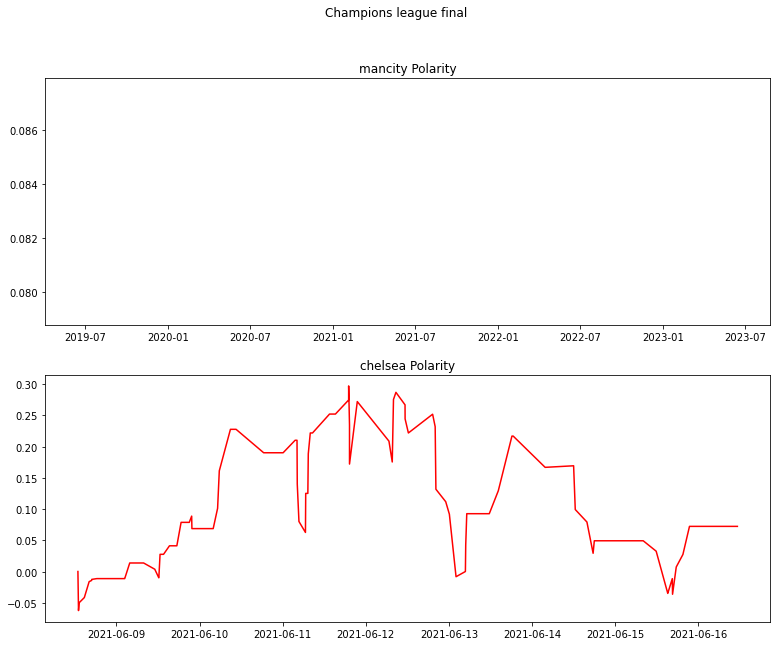

In [47]:
CFC = 'blue'
MCI = 'green'
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

axes[0].plot(mancity['Timestamp'], mancity['MA Polarity'], color = 'blue')
axes[0].set_title("\n".join(["mancity Polarity"]))

axes[1].plot(chelsea['Timestamp'], chelsea['MA Polarity'], color='red')
axes[1].set_title("\n".join(["chelsea Polarity"]))

fig.suptitle("\n".join(["Champions league final"]), y=0.98)

plt.show()